# Data Training
The training process is conducted using TensorFlow, with a convolutional neural network (CNN) model as the foundation. Hyperparameter tracking is managed through Weights & Biases (WandB), while model versioning is implemented via Hugging Face Hub. The initial model is developed using a vanilla CNN architecture, chosen for its simplicity and effectiveness in hypothetical scenarios.

### Import the necesary package

In [1]:
# handling paths
import os
# tracking the training hyperparameters and logs
import wandb
# custom script (store the data loading and preprocessing functions)
import utilities as ut
# handle data visualization
import matplotlib.pyplot as plt
# model versioning
from huggingface_hub import HfApi
# deep learning libraries for training the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax
from tensorflow.keras.callbacks import Callback

d:\Programming\Python\Env_storage\ml_venv_3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Initialize the needed variables
initiate the variables to make the change of hyperparameter and configuration easier

In [2]:
# the path to the dataset
path_dataset = {
    "train": "./dataset/augmented_dataset/train",
    "test": "./dataset/splited_dataset/test",
}
# the hyperparameters of the model
hyperparameters = {
    "augmentation": True,
    "image_size": (128, 128),
    "batch_size": 32,
    "epochs": 10,
    "learning_rate": None,
    "optimizer": "adam",
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "model_structure": {
        "conv": 2,
        "pool": 2,
        "batchnorm": 2,
        "dropout": 1,
        "dense": 2},
}
# the optimizer map
optimizer_map = {
    "adam": Adam(),
    "sgd": SGD(),
    "rmsprop": RMSprop(),
    "adamax": Adamax(),
}
labels = os.listdir(path_dataset["train"])
commit_message = "start using augmentation"

### Get the dataset
Load and preprocess the dataset using custom scripts

In [3]:
# get all the images path
path_imgs_train = ut.get_imgs_path(path_dataset["train"], labels)
path_imgs_test = ut.get_imgs_path(path_dataset["test"], labels)

In [4]:
# create the batched and already preprocessed dataset
trainset = ut.create_dataset(path_imgs_train, hyperparameters["image_size"], hyperparameters["batch_size"])
testset = ut.create_dataset(path_imgs_test, hyperparameters["image_size"], hyperparameters["batch_size"])

### Show the sample image
show the sample image from the batched datasett

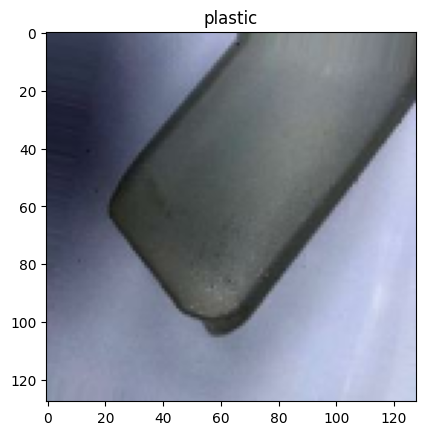

In [5]:
for img, label in trainset.take(1):
    plt.imshow(img[0].numpy())
    plt.title(labels[label[0]])
    plt.show()

### Connect wandb
initialize the wandb to connect and set the config to the current hyperparameters

In [6]:
wandb.init(project="trash-classification",
            name="start using augmentation",
            config=hyperparameters)
config = wandb.config

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: bugi-sulistiyo (bugi-sulistiyo-universitas-mulawarman). Use `wandb login --relogin` to force relogin


### Create the model
the model is created from simple the complex. batch normalization is used to make the value more stable and dropout layer also added to help batch normalization prevent overfitting

In [7]:
model = Sequential([
    # conv layer 1
    Conv2D(32, (3, 3), activation="relu", input_shape=(config.image_size[0], config.image_size[1], 3)),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    # conv layer 2
    Conv2D(64, (3, 3), activation="relu", input_shape=(config.image_size[0], config.image_size[1], 3)),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    # flatten the output
    Flatten(),
    # dense layer 1
    Dense(64, activation="relu"),
    # dropout layer
    Dropout(0.3),
    # output layer
    Dense(len(path_imgs_train.label.unique()), activation="softmax")
])

d:\Programming\Python\Env_storage\ml_venv_3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model config
configure the model with the defined hyperparameter and create a wandb callback

In [8]:
model.compile(
    optimizer=optimizer_map[config.optimizer],
    loss=config.loss,
    metrics=config.metrics
)
class CustomWandbCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        wandb.log(logs)

### Model training
Train the model with test set as validationset

In [9]:
model.fit(
    trainset,
    validation_data=testset,
    epochs=config.epochs,
    callbacks=[CustomWandbCallback()]
)

Epoch 1/10


379/379 ━━━━━━━━━━━━━━━━━━━━ 384s 979ms/step - accuracy: 0.3087 - loss: 4.1490 - val_accuracy: 0.2866 - val_loss: 2.1658
Epoch 2/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 322s 822ms/step - accuracy: 0.3823 - loss: 1.5900 - val_accuracy: 0.1976 - val_loss: 21.9029
Epoch 3/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.3873 - loss: 1.5540 - val_accuracy: 0.3933 - val_loss: 1.4898
Epoch 4/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 415s 1s/step - accuracy: 0.4109 - loss: 1.4554 - val_accuracy: 0.3399 - val_loss: 1.6506
Epoch 5/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.4229 - loss: 1.4215 - val_accuracy: 0.2964 - val_loss: 1.6343
Epoch 6/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 367s 946ms/step - accuracy: 0.4294 - loss: 1.3771 - val_accuracy: 0.2806 - val_loss: 2.1482
Epoch 7/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 395s 1s/step - accuracy: 0.4454 - loss: 1.3375 - val_accuracy: 0.4111 - val_loss: 1.7005
Epoch 8/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.4590 - loss: 1.2978 - val_accur

### Save the model
The model is saved in form of .h5 and .keras. also, capture the log artifact

In [10]:
model.save("model/vanila_cnn.h5")
model.save("model/vanila_cnn.keras")
wandb.log_artifact("model/vanila_cnn.h5", type="model")
wandb.finish()

accuracy,▁▃▄▄▅▆▆▇▇█
loss,█▃▃▂▂▂▂▁▁▁
val_accuracy,▄▁▇▆▄▄██▆▆
val_loss,▁█▁▁▁▁▁▁▂▁
accuracy,0.48903
loss,1.22163
val_accuracy,0.35375
val_loss,1.51883


### Capture model version
upload the model to hugging face

In [13]:
api = HfApi()
repo = api.create_repo("trash-classification", repo_type="model", exist_ok=True)
api.upload_file(
    repo_id=repo.repo_id,
    path_or_fileobj="model/vanila_cnn.h5",
    path_in_repo="model/vanila_cnn.h5",
    repo_type=repo.repo_type,
    commit_message=f".h5 file - {commit_message}"
)
api.upload_file(
    repo_id=repo.repo_id,
    path_or_fileobj="model/vanila_cnn.keras",
    path_in_repo="model/vanila_cnn.keras",
    repo_type=repo.repo_type,
    commit_message=f".keras - {commit_message}"
)

vanila_cnn.keras: 100%|██████████| 44.5M/44.5M [00:27<00:00, 1.64MB/s]


CommitInfo(commit_url='https://huggingface.co/bugi-sulistiyo/trash-classification/commit/56937197a35de23e7a970255959c8708e9da977b', commit_message='.keras - start using augmentation', commit_description='', oid='56937197a35de23e7a970255959c8708e9da977b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/bugi-sulistiyo/trash-classification', endpoint='https://huggingface.co', repo_type='model', repo_id='bugi-sulistiyo/trash-classification'), pr_revision=None, pr_num=None)